# COURSERA COURSE 7 CHALLENGE
##### Link file csv: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings

#### Câu 1: What is another benefit of using R for the project?
"Create high-quality visualizations" hoặc đáp án có "Share analysis", tùy đề.

#### Câu 2: Import dataframes từ file csv (tải trên Kaggle)

In [1]:
#Import essential packages
library('tidyverse')
library('janitor')
#Import dataframes from flavors_of_cacao.csv
bars_df <- read_csv('flavors_of_cacao.csv')
colnames(bars_df) #To see that column names are not available to use (because of \n)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


Rows: 1795 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Company 
(Maker-if known), Specific Bean Origin
or Bar Name, Cocoa
...
dbl (3): REF, Review
Date, Rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this m

[1] "Company \n(Maker-if known)"        "Specific Bean Origin\nor Bar Name"
[3] "REF"                               "Review\nDate"                     
[5] "Cocoa\nPercent"                    "Company\nLocation"                
[7] "Rating"                            "Bean\nType"                       
[9] "Broad Bean\nOrigin"

#### Câu 3: Xem contents của dataframe vừa import

In [2]:
glimpse(bars_df)

Rows: 1,795
Columns: 9
$ `Company \n(Maker-if known)`        <chr> "A. Morin", "A. Morin", "A. Morin"…
$ `Specific Bean Origin\nor Bar Name` <chr> "Agua Grande", "Kpime", "Atsane", …
$ REF                                 <dbl> 1876, 1676, 1676, 1680, 1704, 1315…
$ `Review\nDate`                      <dbl> 2016, 2015, 2015, 2015, 2015, 2014…
$ `Cocoa\nPercent`                    <chr> "63%", "70%", "70%", "70%", "70%",…
$ `Company\nLocation`                 <chr> "France", "France", "France", "Fra…
$ Rating                              <dbl> 3.75, 2.75, 3.00, 3.50, 3.50, 2.75…
$ `Bean\nType`                        <chr> " ", " ", " ", " ", " ", "Criollo"…
$ `Broad Bean\nOrigin`                <chr> "Sao Tome", "Togo", "Togo", "Togo"…


#### Câu 4,5: Chọn ra 3 thuộc tích (Cocoa Percent, Company Location và Rating)
Trước khi nhập select được, ta nhận thấy tên của mỗi cột đang không thể sử dụng được vì chứa ký tự xuống dòng (\n) và các ký tự đặc biệt như dấu cách và dấu ngoặc, nên ta cần cleans và drop NA trước. Chính vì vậy nếu không xử lý tên cột trước, hàm select sẽ không thể biết được cột nào.

In [3]:
#Preview Dataframes before processing
head(bars_df)

Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


In [4]:
#Pre Processing (column names and drop NA)
processed_df <- bars_df %>%
    clean_names(.) %>%
    drop_na(.) %>%
    rename(company = company_maker_if_known, bar_name = specific_bean_origin_or_bar_name)
head(processed_df)

company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


In [5]:
#Select specific datas
trimmed_df <- processed_df %>%
    select(rating, cocoa_percent, company_location)
head(trimmed_df)

rating,cocoa_percent,company_location
<dbl>,<chr>,<chr>
3.75,63%,France
2.75,70%,France
3.00,70%,France
3.50,70%,France
3.50,70%,France
2.75,70%,France


#### Câu 6: Tính trung bình của rating 

In [6]:
trimmed_df %>%
    summarize(mean(rating))

mean(rating)
<dbl>
3.185862


#### Câu 7: Lọc chocolate bars chứa ít nhất 75% cocoa and và có rating ít nhất 3.9 points

In [7]:
best_trimmed_flavors <- trimmed_df %>%
    filter(cocoa_percent >= 75, rating >= 3.9) 
head(best_trimmed_flavors)

rating,cocoa_percent,company_location
<dbl>,<chr>,<chr>
4,75%,Italy
4,75%,France
4,75%,France
4,75%,France
4,75%,France
4,75%,France


#### Câu 8, 9, 10, 11, 12: Vẽ đồ thị 
Các câu này tương đối giống nhau và kiểu như tách các bước của nhau làm các câu nhỏ:
Ví dụ như câu 8 sẽ là vẽ geom_bar, câu 9 sẽ thêm file, câu 10 nó sẽ kêu thêm tiêu đề.
Riêng câu 11 và 12 là vẽ và ggsave().

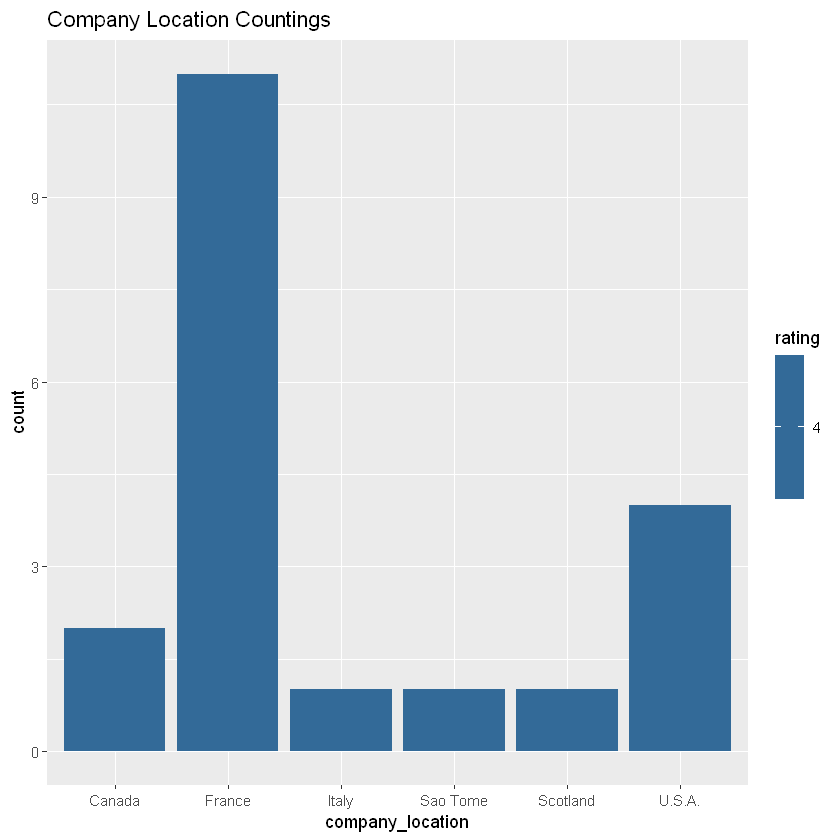

In [8]:
p <- ggplot(data = best_trimmed_flavors) +
    geom_bar(mapping = aes(x = company_location, fill = rating))
p + labs(title = 'Company Location Countings')

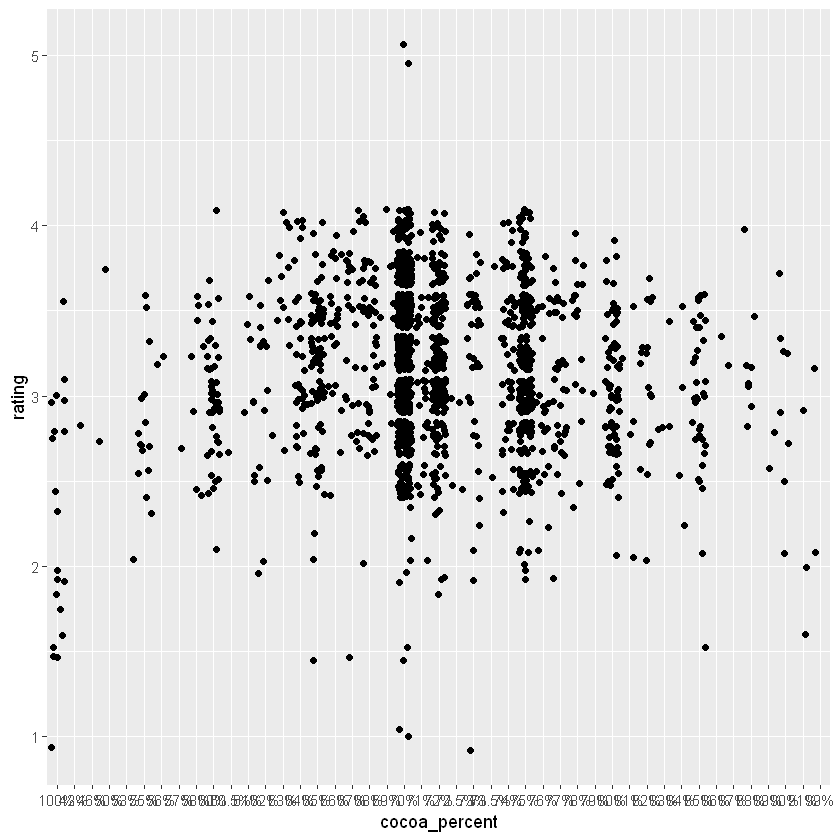

In [9]:
ggplot(data = processed_df) +
    geom_jitter(mapping = aes(x = cocoa_percent, y = rating)) 

In [10]:
ggsave('chocolate.jpg')

Saving 6.67 x 6.67 in image

